t = 1/lambda * ln(p)

 t1 t2     tn
_o__o_______o__
T0     ...     Tk

lambda[1/сек] (интенсивность (обратно пропорциональна среднему времени))

     Tk - T0
Ts = -------                     
     (k - 1) (кол-во интервалов)
    
lambda ~ Ts

=====================
lambda = 0.1 [1/мс]
Tk = 1000 мс
Можно насти Tc и интенсивность 
Понять, как лямбда и Ts связаны

lambda = 1/Ts
Ts ~ 10 (должны получить среднее около 10)

после нескольких опытов получим в сумме примерно 10 мс
==========================

lambda = 1.5 [1/мс] (гистограммы построить)
n = 10**3

t1 t2 ..... tn  (по формуле t = 1/lambda * ln(p))

min(ti) = t_min
max(ti) = t_max

(Для гистограммы)
           k = 10 интервалов
___o________________________o______>t
  t_min                    t_max

tk1     1
---    ----
ts     dett

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def get_t(lmbd, p):
    return -1 / lmbd * np.log(p)

def generate_hist_and_probs(mu, n=10000):
    p = np.random.random(n)
    t = get_t(mu, p)

    hist, bins = np.histogram(t, bins=24, range=(0, 10), density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    width = bin_centers[1] - bin_centers[0]
    plt.title(f'Mu = {mu}')
    plt.bar(bin_centers, hist, width=width)
    plt.xlabel('t, мс')
    plt.ylabel('Плотность вероятности')
    plt.show()

    probs = hist / np.sum(hist)
    cum_probs = np.cumsum(probs)
    return cum_probs, bin_centers

In [79]:
lmbd = 0.1 
Tk = 100
n = 10

results_counts = []
all_intervals = []

for i in range(n):
    current_time = 0
    intervals = []
    while True:
        p = np.random.random()
        dt = get_t(lmbd, p)
        if current_time + dt > Tk:
            break
        current_time += dt
        intervals.append(dt)

    results_counts.append(len(intervals))
    all_intervals.extend(intervals)

print(f'Среднее число поступивших заявок: {np.mean(results_counts)}')
print(f'Среднее время между приходами заявок: {np.mean(all_intervals)}')


Среднее число поступивших заявок: 10.1
Среднее время между приходами заявок: 9.221762734917542


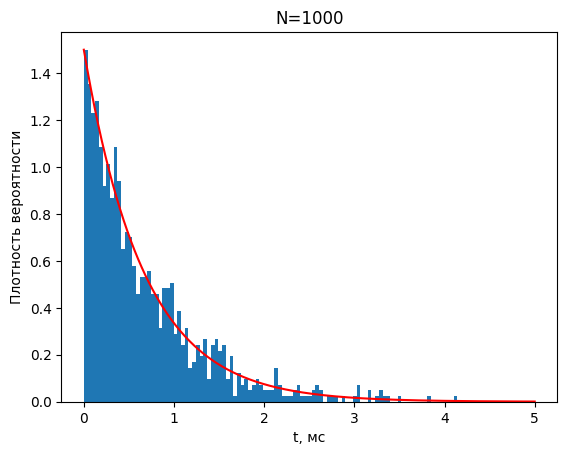

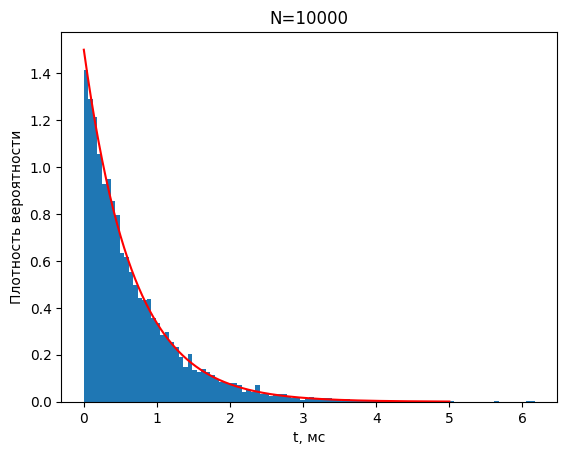

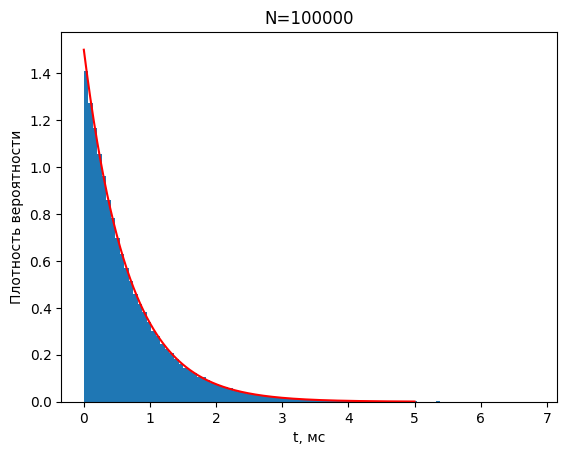

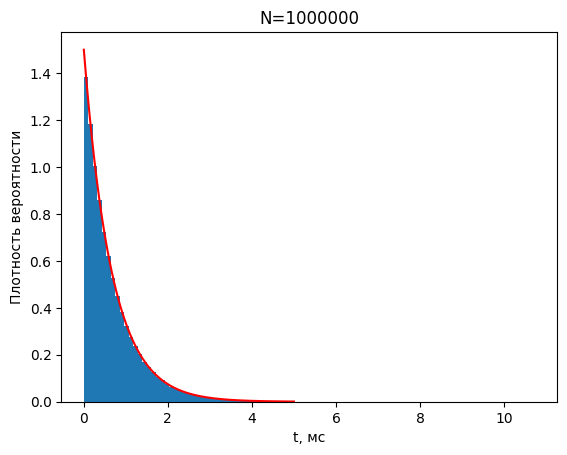

In [71]:
lmbd = 1.5
N = [10**x for x in range(3, 7)]
T = []
k = 100

t_theor = np.linspace(0, 5, 500)
f_theor = lmbd * np.exp(-lmbd * t_theor)

for n in N:
    p = np.random.random(n)
    t = get_t(lmbd, p)
    T.append(t)

    counts, bins = np.histogram(t, bins=k, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    width = bins[1] - bins[0]

    plt.title(f'N={n}')
    plt.plot(t_theor, f_theor, color='red')
    plt.bar(bin_centers, counts, width=width)
    plt.xlabel('t, мс')
    plt.ylabel('Плотность вероятности')
    plt.show()

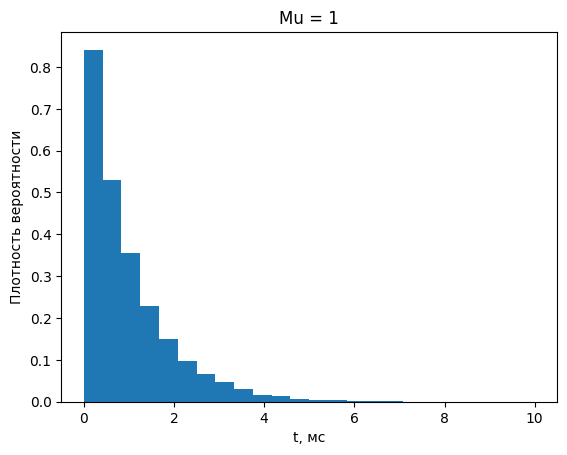

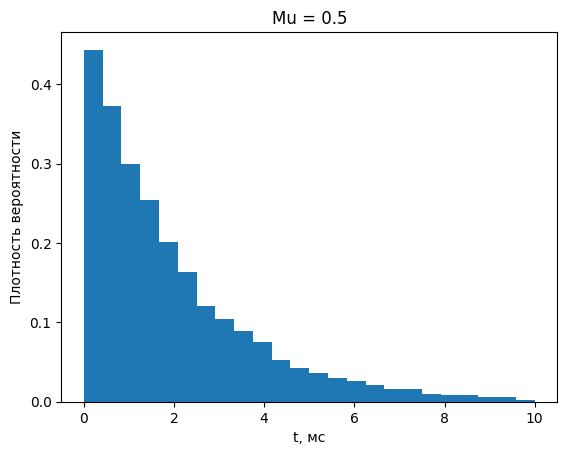

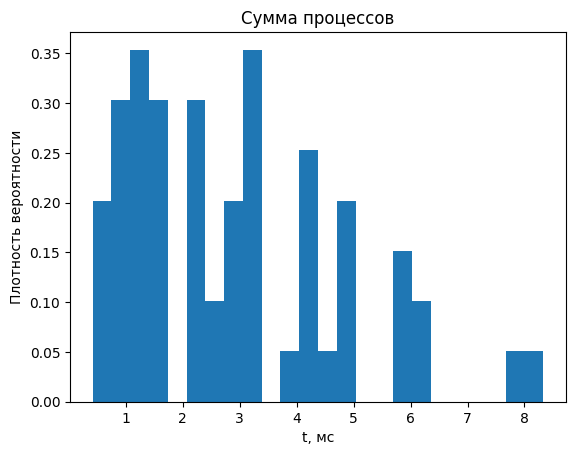

In [99]:
mu1 = 1
mu2 = 0.5
n = 60

cum_probs1, centers1 = generate_hist_and_probs(mu1)
cum_probs2, centers2 = generate_hist_and_probs(mu2)

tp_sums = []

for _ in range(n):
    p1 = np.random.random()
    p2 = np.random.random()

    idx1 = np.searchsorted(cum_probs1, p1)
    idx1 = min(idx1, len(centers1) - 1)

    idx2 = np.searchsorted(cum_probs2, p2)
    idx2 = min(idx2, len(centers2) - 1)

    tp1 = centers1[idx1]
    tp2 = centers1[idx2]

    tp_sum = tp1 + tp2
    tp_sums.append(tp_sum)

plt.title(f'Mu1 и Mu2')
plt.hist(tp_sums, bins=24, density=True)
plt.title("Сумма процессов")
plt.xlabel("t, мс")
plt.ylabel("Плотность вероятности")
plt.show()